In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

/tmp/ipykernel_4239/3555531057.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)
/tmp/ipykernel_4239/3555531057.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)
/tmp/ipykernel_4239/3555531057.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)


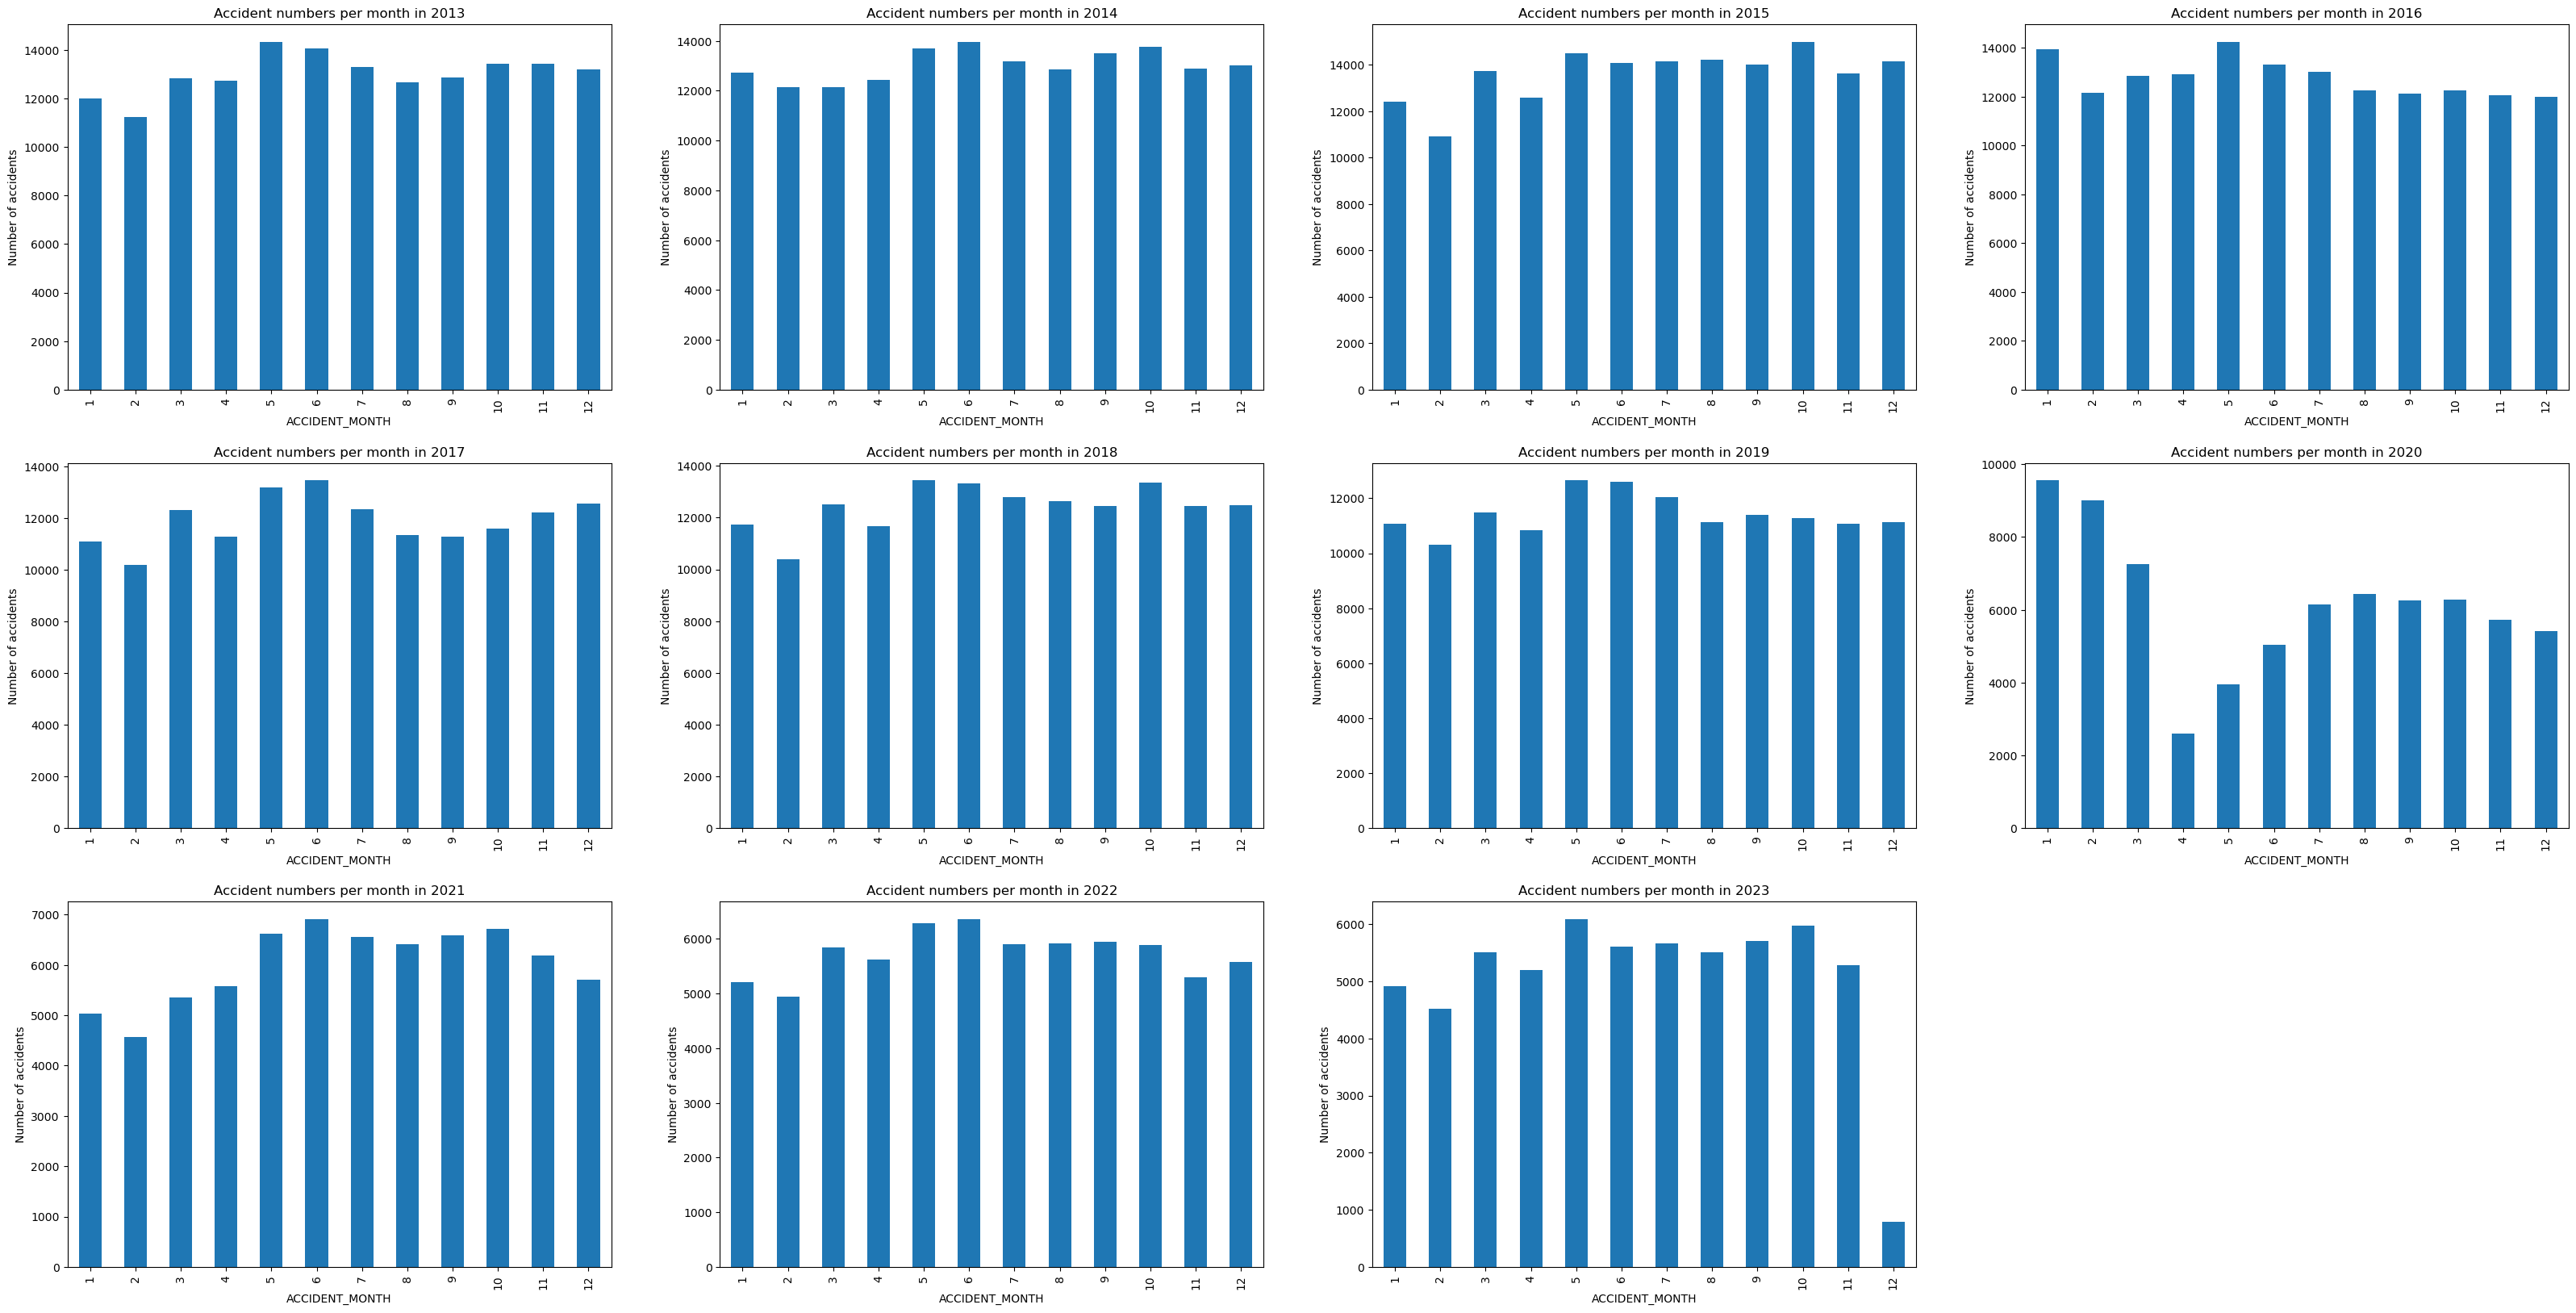

In [62]:
plt.rcParams['figure.figsize'] = (40,20)
datasets = []
for i in range(2013, 2024):
    
    file = f"./datasets/crashes_2012-23/crashes_{i}.csv"

    result = pd.read_csv(file)
    result.dropna(subset=['BOROUGH'], inplace=True)
    
    result["CRASH DATE"] = pd.to_datetime(result["CRASH DATE"])
    result["ACCIDENT_MONTH"] = result["CRASH DATE"].dt.month

    result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH DATE']

    plt.subplot(3,4,i-2012)
    result_grped.plot.bar()
    plt.title(f"Accident numbers per month in {i}")
    plt.ylabel("Number of accidents")
    

plt.show()

In [63]:
rainfall_jfk = pd.read_csv("./datasets/jfk.csv")
rainfall_lg = pd.read_csv("./datasets/LaGuardia.csv")
rainfall_cp = pd.read_csv("./datasets/Central Park.csv")
rainfall_cp

,Date,Value,Anomaly
0,201201,3.23,-0.41
1,201202,1.37,-1.82
2,201203,0.96,-3.33
3,201204,3.56,-0.53
4,201205,5.37,1.41
...,...,...,...
91,201908,3.70,-0.86
92,201909,0.95,-3.36
93,201910,6.16,1.78
94,201911,1.95,-1.63


In [64]:
temp_jfk = pd.read_csv("./datasets/jfk_temp.csv")
temp_lg = pd.read_csv("./datasets/lg_temp.csv")
temp_cp = pd.read_csv("./datasets/cp_temp.csv")
temp_cp

,Date,Value,Anomaly
0,201201,37.8,4.1
1,201202,41.4,5.6
2,201203,51.4,8.6
3,201204,55.3,1.7
4,201205,65.6,2.4
...,...,...,...
91,201908,75.5,-0.5
92,201909,70.4,1.2
93,201910,59.9,2.0
94,201911,43.9,-4.1


In [65]:
rainfall = rainfall_cp
rainfall.drop(columns=['Anomaly'], inplace=True)
rainfall['Value'] = round((rainfall_cp['Value']+rainfall_jfk['Value']+rainfall_lg['Value'])/3, 2)
rainfall

,Date,Value
0,201201,2.64
1,201202,1.32
2,201203,1.03
3,201204,3.24
4,201205,5.71
...,...,...
91,201908,3.33
92,201909,0.90
93,201910,5.48
94,201911,1.70


In [66]:
temp = temp_cp
temp.drop(columns=['Anomaly'], inplace=True)
temp['Value'] = round((temp_cp['Value']+temp_jfk['Value']+temp_lg['Value'])/3, 2)
temp

,Date,Value
0,201201,37.60
1,201202,41.17
2,201203,50.37
3,201204,55.17
4,201205,65.23
...,...,...
91,201908,76.17
92,201909,70.63
93,201910,60.47
94,201911,44.10


In [67]:
rainfall['Date']

0     201201
1     201202
2     201203
3     201204
4     201205
       ...  
91    201908
92    201909
93    201910
94    201911
95    201912
Name: Date, Length: 96, dtype: int64

In [74]:
def getTransformedDataFrame(datasets):
    dataset = []
    for i in range(2013, 2020):
    
        result = datasets[i-2013]
        result.dropna(subset=['BOROUGH'], inplace=True)
        
        result["CRASH DATE"] = pd.to_datetime(result["CRASH DATE"])
        result["ACCIDENT_MONTH"] = result["CRASH DATE"].dt.month

        result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH DATE']
        
        for j in range(1,13):
            dictionary = {'Year':i, 'Month':j, 'Accidents':result_grped[j], 'Precipitation': rainfall.loc[rainfall['Date'] == 100*i+j].iloc[0]['Value'], 
                        'Temperature':temp.loc[temp['Date'] == 100*i+j].iloc[0]['Value']}  
            dataset.append(dictionary)

    transformed_df = pd.DataFrame(dataset)
    return transformed_df

In [76]:
datasets = []
for i in range(2013, 2020):

    file = f"./datasets/crashes_2012-23/crashes_{i}.csv"
    result = pd.read_csv(file)
    datasets.append(result)

transformed_df = getTransformedDataFrame(datasets)

print(transformed_df['Accidents'].corr(transformed_df['Precipitation']))
print(transformed_df['Accidents'].corr(transformed_df['Temperature']))

/tmp/ipykernel_4239/2738612449.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)
/tmp/ipykernel_4239/2738612449.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)
/tmp/ipykernel_4239/2738612449.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv(file)


0.015899959774168353
0.3625494781213239


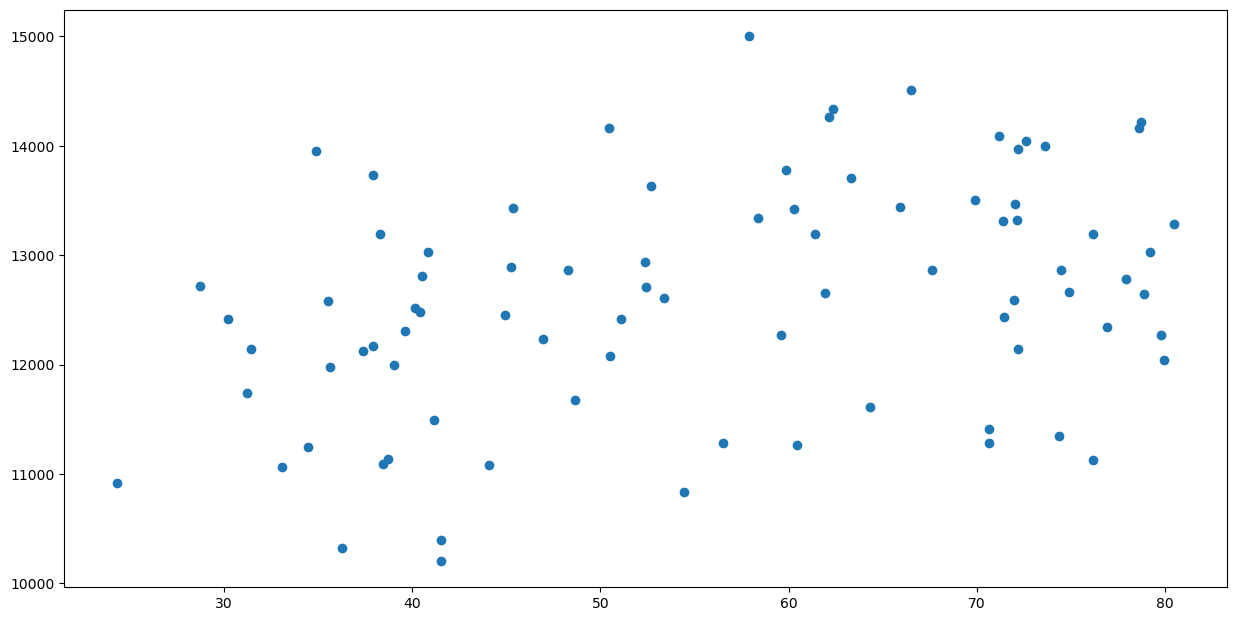

In [71]:
plt.rcParams['figure.figsize'] = (15,7.5)
plt.scatter(transformed_df['Temperature'], transformed_df['Accidents'])
plt.show()

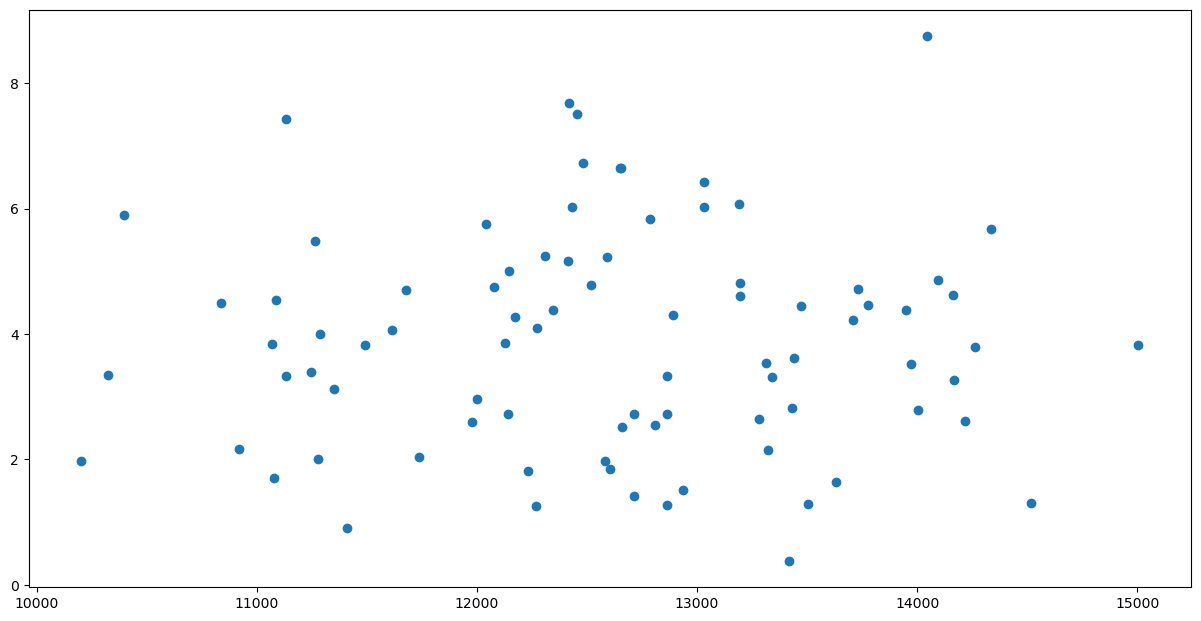

In [78]:
plt.rcParams['figure.figsize'] = (15,7.5)
plt.scatter(transformed_df['Accidents'], transformed_df['Precipitation'])
plt.show()

In [79]:
groupingDictionary_common = {
    "Distraction" : ["Driver Inattention/Distraction", "Outside Car Distraction", "Passenger Distraction", "Glare", "Cell Phone (hand-held)", "Cell Phone (hands-free)", "Other Electronic Device"], 
    "Car Defects" : ["Accelerator Defective", "Brakes Defective", "Headlights Defective", "Other Lighting Defects", "Steering Failure", "Tire Failure/Inadequate", "Tow Hitch Defective", "Windshield Inadequate"],
    "Substance Abuse" : ["Alcohol Involvement", "Drugs (Illegal)", "Prescription Medication"],
    "Driver not at fault" : ["Animals Action", "Lane Marking Improper/Inadequate", "Obstruction/Debris", "Other Vehicular", "Pavement Defective", "Pavement Slippery", "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "Reaction to Other Uninvolved Vehicle", "Shoulders Defective/Improper", "Traffic Control Device Improper/Non-Working", "View Obstructed/Limited"], 
    "Driver Inexperience" : ["Driver Inexperience"], 
    "Medical/Fatigue" : ["Fatigued/Drowsy", "Fell Asleep", "Illness", "Lost Consciousness", "Physical Disability"], 
    "Traffic Rule Violation" : ["Aggressive Driving/Road Rage", "Backing Unsafely", "Failure to Keep Right", "Failure to Yield Right-of-Way", "Following Too Closely", "Oversized Vehicle", "Passing Too Closely", "Passing or Lane Usage Improper", "Traffic Control Disregarded", "Turning Improperly", "Unsafe Lane Changing", "Unsafe Speed"]
}
    
def custom_acc_type(row, column):
    for j in groupingDictionary_common.keys():
        if (column == 1):
            if row['CONTRIBUTING FACTOR VEHICLE 1'] in groupingDictionary_common[j]:
                return j

In [80]:
for i in range(len(datasets)):
    datasets[i]['MAJOR ACCIDENT TYPE 1'] = datasets[i].apply(custom_acc_type, column=1 ,axis=1)

In [84]:
for cause in groupingDictionary_common.keys():
    datasets_temp = []

    for dataset in datasets:
        datasets_temp.append(dataset[dataset['MAJOR ACCIDENT TYPE 1'] == cause])
    
    transformed_df = getTransformedDataFrame(datasets_temp)
    print("+-------------------------+")
    print(cause)
    print(transformed_df['Accidents'].corr(transformed_df['Precipitation']))
    print(transformed_df['Accidents'].corr(transformed_df['Temperature']))

    print("+-------------------------+")

+-------------------------+
Distraction
0.1691605298315272
0.3127496288091716
+-------------------------+
+-------------------------+
Car Defects
-0.0419034472692093
0.33906259766185404
+-------------------------+
+-------------------------+
Substance Abuse
-0.13088824858431805
0.0345883220412189
+-------------------------+
+-------------------------+
Driver not at fault
0.05004714688043363
-0.33737503445567324
+-------------------------+
+-------------------------+
Driver Inexperience
-0.010306867414461747
0.47969341271503874
+-------------------------+
+-------------------------+
Medical/Fatigue
-0.12777175341759567
-0.029989868545661234
+-------------------------+
+-------------------------+
Traffic Rule Violation
0.13398485444185726
0.1657875421781674
+-------------------------+
